# Data Processing with Titanic Datasest by Sunitha Mekala

# Performing Data Cleaning and Analysis

1. Understanding meaning of each column:

Survived - Survived (1) or died (0)
Pclass - Passenger’s class (1 = 1st, 2 = 2nd, 3 = 3rd)
Name - Passenger’s name
Sex - Passenger’s sex
Age - Passenger’s age
SibSp - Number of siblings/spouses aboard
Parch - Number of parents/children aboard (Some children travelled only with a nanny, therefore parch=0 for them.)
Ticket - Ticket number
Fare - Fare
Cabin - Cabin
Embarked - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

2. Analysing which columns are completely useless in predicting the survival and deleting them
Note - Don't just delete the columns because you are not finding it useful. Or focus is not on deleting the columns. Our focus is on analysing how each column is affecting the result or the prediction and in accordance with that deciding whether to keep the column or to delete the column or fill the null values of the column by some values and if yes, then what values.

In [3]:
import pandas as pd
import numpy as np

In [4]:
titanic = pd.read_csv(r'D:\SUNITHA\Sample Datasets\titanic dataset.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
titanic.shape

(891, 12)

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Checking the columns which are not needed and deleting them

In [9]:
# Here we can delete the name column, as name column can never decide survival of a person
del titanic['Name']
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
del titanic['Ticket']
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [11]:
del titanic["Fare"]
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,1,0,3,male,22.0,1,0,NaN,S
1,2,1,1,female,38.0,1,0,C85,C
2,3,1,3,female,26.0,0,0,NaN,S
3,4,1,1,female,35.0,1,0,C123,S
4,5,0,3,male,35.0,0,0,NaN,S


In [12]:
del titanic['Cabin']
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [13]:
# Changing Value for "Male, Female" string values to numeric values , male=1 and female=2
def getNumber(str):
    if str=="male":
        return 1
    else:
        return 2
titanic["Gender"]=titanic["Sex"].apply(getNumber)
#We have created a new column called "Gender" and 
#filling it with values 1,2 based on the values of sex column
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,male,22.0,1,0,S,1
1,2,1,1,female,38.0,1,0,C,2
2,3,1,3,female,26.0,0,0,S,2
3,4,1,1,female,35.0,1,0,S,2
4,5,0,3,male,35.0,0,0,S,1


In [14]:
#Deleting Sex column, since no use of it now
del titanic["Sex"]
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,22.0,1,0,S,1
1,2,1,1,38.0,1,0,C,2
2,3,1,3,26.0,0,0,S,2
3,4,1,1,35.0,1,0,S,2
4,5,0,3,35.0,0,0,S,1


In [15]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Embarked         2
Gender           0
dtype: int64

## Fill the null values of the Age column. 
### If person has survived -  fill the missed aged column value with mean age of survived people
### If person has not survived -  fill the missed aged column value with mean age of not survived people

In [17]:
meanS = titanic[titanic.Survived == 1].Age.mean()
meanS

28.343689655172415

## Creating a new "Age" column:
### filling values in it with a condition:
### if goes True then given values (here meanS) 
### if nothing happens, simply the values are copied from the "Age" column of the dataset

In [19]:
titanic["age"]=np.where(pd.isnull(titanic.Age) & titanic["Survived"]==1  ,meanS, titanic["Age"])
titanic.head(20)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender,age
0,1,0,3,22.0,1,0,S,1,22.00000
1,2,1,1,38.0,1,0,C,2,38.00000
2,3,1,3,26.0,0,0,S,2,26.00000
3,4,1,1,35.0,1,0,S,2,35.00000
4,5,0,3,35.0,0,0,S,1,35.00000
5,6,0,3,NaN,0,0,Q,1,NaN
6,7,0,1,54.0,0,0,S,1,54.00000
7,8,0,3,2.0,3,1,S,1,2.00000
8,9,1,3,27.0,0,2,S,2,27.00000
9,10,1,2,14.0,1,0,C,2,14.00000


In [20]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Embarked         2
Gender           0
age            125
dtype: int64

In [21]:
# Finding the mean age of "Not Survived" people
meanNS = titanic[titanic.Survived == 0].Age.mean()
meanNS

30.62617924528302

In [22]:
titanic.age.fillna(meanNS,inplace=True)
titanic.head(20)

C:\Users\SUNITHA\AppData\Local\Temp\ipykernel_2672\629902309.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic.age.fillna(meanNS,inplace=True)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender,age
0,1,0,3,22.0,1,0,S,1,22.000000
1,2,1,1,38.0,1,0,C,2,38.000000
2,3,1,3,26.0,0,0,S,2,26.000000
3,4,1,1,35.0,1,0,S,2,35.000000
4,5,0,3,35.0,0,0,S,1,35.000000
5,6,0,3,NaN,0,0,Q,1,30.626179
6,7,0,1,54.0,0,0,S,1,54.000000
7,8,0,3,2.0,3,1,S,1,2.000000
8,9,1,3,27.0,0,2,S,2,27.000000
9,10,1,2,14.0,1,0,C,2,14.000000


In [23]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Embarked         2
Gender           0
age              0
dtype: int64

In [24]:
del titanic['Age']
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Gender,age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


#### We want to check if "Embarked" column is is important for analysis or not, that is whether survival of the person depends on the Embarked column value or not###

In [26]:
# Finding the number of people who have survived 
# given that they have embarked or boarded from a particular port

survivedQ = titanic[titanic.Embarked == 'Q'][titanic.Survived == 1].shape[0]
survivedC = titanic[titanic.Embarked == 'C'][titanic.Survived == 1].shape[0]
survivedS = titanic[titanic.Embarked == 'S'][titanic.Survived == 1].shape[0]
print(survivedQ)
print(survivedC)
print(survivedS)

30
93
217


C:\Users\SUNITHA\AppData\Local\Temp\ipykernel_2672\3300902897.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedQ = titanic[titanic.Embarked == 'Q'][titanic.Survived == 1].shape[0]
C:\Users\SUNITHA\AppData\Local\Temp\ipykernel_2672\3300902897.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedC = titanic[titanic.Embarked == 'C'][titanic.Survived == 1].shape[0]
C:\Users\SUNITHA\AppData\Local\Temp\ipykernel_2672\3300902897.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedS = titanic[titanic.Embarked == 'S'][titanic.Survived == 1].shape[0]


In [27]:
survivedQ = titanic[titanic.Embarked == 'Q'][titanic.Survived == 0].shape[0]
survivedC = titanic[titanic.Embarked == 'C'][titanic.Survived == 0].shape[0]
survivedS = titanic[titanic.Embarked == 'S'][titanic.Survived == 0].shape[0]
print(survivedQ)
print(survivedC)
print(survivedS)

47
75
427


C:\Users\SUNITHA\AppData\Local\Temp\ipykernel_2672\3240960939.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedQ = titanic[titanic.Embarked == 'Q'][titanic.Survived == 0].shape[0]
C:\Users\SUNITHA\AppData\Local\Temp\ipykernel_2672\3240960939.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedC = titanic[titanic.Embarked == 'C'][titanic.Survived == 0].shape[0]
C:\Users\SUNITHA\AppData\Local\Temp\ipykernel_2672\3240960939.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedS = titanic[titanic.Embarked == 'S'][titanic.Survived == 0].shape[0]


As there are significant changes in the survival rate based on which port the passengers aboard the ship. 
We cannot delete the whole embarked column(It is useful). 
Now the Embarked column has some null values in it and hence we can safely say that deleting some rows from total rows will not affect the result. So rather than trying to fill those null values with some vales. We can simply remove them.

In [29]:
titanic.dropna(inplace = True)
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Gender,age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


In [30]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
SibSp          0
Parch          0
Embarked       0
Gender         0
age            0
dtype: int64

## Renaming "age" and "gender" columns

In [32]:
#Renaming "age" and "gender" columns
titanic.rename(columns={'age':'Age'}, inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Gender,Age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


In [33]:
titanic.rename(columns = {"Gender":"Sex"}, inplace = True)
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Sex,Age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


In [34]:
def getEmb(str):
    if str == "S":
        return 1
    elif str == "Q":
        return 2
    else:
        return 3
titanic["Embark"] = titanic["Embarked"].apply(getEmb)
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Sex,Age,Embark
0,1,0,3,1,0,S,1,22.0,1
1,2,1,1,1,0,C,2,38.0,3
2,3,1,3,0,0,S,2,26.0,1
3,4,1,1,1,0,S,2,35.0,1
4,5,0,3,0,0,S,1,35.0,1


In [35]:
del titanic['Embarked']
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Sex,Age,Embark
0,1,0,3,1,0,1,22.0,1
1,2,1,1,1,0,2,38.0,3
2,3,1,3,0,0,2,26.0,1
3,4,1,1,1,0,2,35.0,1
4,5,0,3,0,0,1,35.0,1


In [36]:
#Renaming again the Embark column to Embarked
titanic.rename(columns = {'Embark':'Embarked'}, inplace = True)
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Sex,Age,Embarked
0,1,0,3,1,0,1,22.0,1
1,2,1,1,1,0,2,38.0,3
2,3,1,3,0,0,2,26.0,1
3,4,1,1,1,0,2,35.0,1
4,5,0,3,0,0,1,35.0,1


577
312


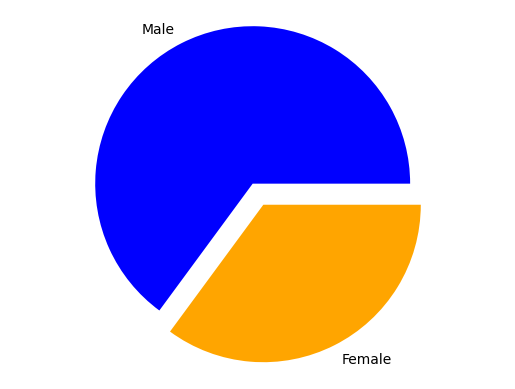

In [68]:
#Drawing a pie chart for number of males and females aboard
import matplotlib.pyplot as plt
from matplotlib import style

#Summing up all the values of column gender with a 
#condition for male and similary for females
males = (titanic['Sex'] == 1).sum()
females = (titanic['Sex'] == 2).sum()
print(males)
print(females)

p = [males, females]
plt.pie(p,    #giving array 
        labels = ['Male', 'Female'], #Giving labels
        colors = ['blue', 'orange'], #corresponding colors
        explode = (0.15,0), #Gap between the pies
        startangle = 0) #What start angle should be given
plt.axis('equal')
plt.show()

In [70]:
# More Precise Pie Chart
MaleS=titanic[titanic.Sex==1][titanic.Survived==1].shape[0]
print(MaleS)
MaleN=titanic[titanic.Sex==1][titanic.Survived==0].shape[0]
print(MaleN)
FemaleS=titanic[titanic.Sex==2][titanic.Survived==1].shape[0]
print(FemaleS)
FemaleN=titanic[titanic.Sex==2][titanic.Survived==0].shape[0]
print(FemaleN)

109
468
231
81


C:\Users\SUNITHA\AppData\Local\Temp\ipykernel_2672\3105620411.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MaleS=titanic[titanic.Sex==1][titanic.Survived==1].shape[0]
C:\Users\SUNITHA\AppData\Local\Temp\ipykernel_2672\3105620411.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MaleN=titanic[titanic.Sex==1][titanic.Survived==0].shape[0]
C:\Users\SUNITHA\AppData\Local\Temp\ipykernel_2672\3105620411.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  FemaleS=titanic[titanic.Sex==2][titanic.Survived==1].shape[0]
C:\Users\SUNITHA\AppData\Local\Temp\ipykernel_2672\3105620411.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  FemaleN=titanic[titanic.Sex==2][titanic.Survived==0].shape[0]


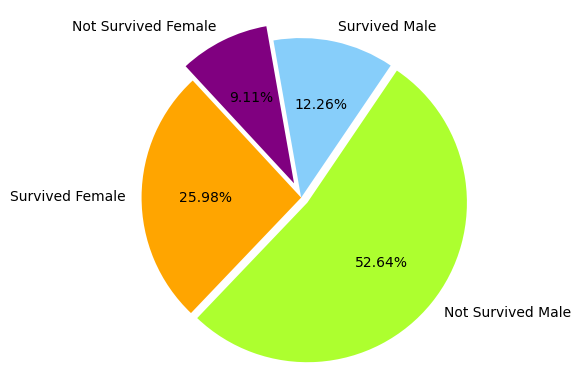

In [92]:
chart=[MaleS,MaleN,FemaleS,FemaleN]
colors=['lightskyblue','greenyellow','Orange','Purple']
labels=["Survived Male","Not Survived Male","Survived Female","Not Survived Female"]
explode=[0,0.05,0,0.1]
plt.pie(chart,labels=labels,colors=colors,explode=explode,startangle=100,counterclock=False,autopct="%.2f%%")
plt.axis("equal")
plt.show()